In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
df= pd.read_csv('EW_csv.csv',encoding='CP949')

# 연령별 EW등급, 정상률, 폐업률, 부도율 비교
- 청년층 : 2~30대
- 중장년층 : 4~60대 
- 청년층과 중장년층의 부도율, 정상률, 폐업률 비교  

In [17]:
temp= ~((df.대표자연령구간 == '10대미만') | (df.대표자연령구간 == '90대이상') | (df.대표자연령구간 == '정보없음'))
df=df[temp]
test = df.groupby(['대표자연령구간','EW등급'])['EW등급'].count()
test=pd.DataFrame(test)
test=test.unstack()
test = test.fillna(0)
test=test.reset_index()
test['총합']=test.sum(axis=1)
total = test['총합']
normal = test['EW등급']['정상']
rate = (normal/total)*100
test['정상률']=rate
dead= test['EW등급']['폐업']
rate = (dead/total)*100
test['폐업률']=rate
budo=((test['EW등급']['관심']*0.15)+(test['EW등급']['관찰1']*0.20)+(test['EW등급']['관찰2']*0.30)+(test['EW등급']['관찰3']*0.90)+(test['EW등급']['부도']*1))
budo_sum=test['EW등급']['관심']+test['EW등급']['관찰1']+test['EW등급']['관찰2']+test['EW등급']['관찰3']+test['EW등급']['부도']+test['EW등급']['정상']+test['EW등급']['폐업']
budo_rate = (budo/budo_sum)*100
test['부도율']=budo_rate
test=test.set_index('대표자연령구간')


In [18]:
col_li=list(map(lambda x: ' '.join(x[1:]),test.columns))
col_li[8]='총합'
col_li[9]='정상률'
col_li[10]='폐업률'
col_li[11]='부도율'
print(col_li)
test.columns=col_li
test


['관심', '관찰1', '관찰2', '관찰3', '부도', '정상', '폐업', '휴업', '총합', '정상률', '폐업률', '부도율']


,관심,관찰1,관찰2,관찰3,부도,정상,폐업,휴업,총합,정상률,폐업률,부도율
대표자연령구간,,,,,,,,,,,,
10대,269.0,161.0,306.0,81.0,0.0,12739.0,498.0,10.0,14064.0,90.578783,3.540956,1.688131
20대,15714.0,18821.0,62673.0,14367.0,93.0,648371.0,45283.0,1512.0,806834.0,80.359901,5.612431,4.711966
30대,73567.0,119293.0,283568.0,77145.0,1000.0,2679303.0,448429.0,9615.0,3691920.0,72.572076,12.146227,5.170526
40대,203351.0,319298.0,591995.0,220239.0,3433.0,6142955.0,1563309.0,32067.0,9076647.0,67.678681,17.223420,5.236383
50대,253628.0,501334.0,745512.0,280861.0,8957.0,7921432.0,2479142.0,46802.0,12237668.0,64.729914,20.258288,5.116097
60대,109361.0,301572.0,372568.0,128629.0,6601.0,4852993.0,1618851.0,28880.0,7419455.0,65.409023,21.819002,4.206115
70대,20015.0,68305.0,73329.0,21492.0,1439.0,1474312.0,498708.0,6264.0,2163864.0,68.133302,23.047105,2.755087
80대,2162.0,11005.0,12163.0,3087.0,422.0,347045.0,113274.0,964.0,490122.0,70.807880,23.111389,1.916456
90대,105.0,788.0,863.0,140.0,0.0,50759.0,12003.0,79.0,64737.0,78.408020,18.541174,0.863389


### 연령별 부도율 : 20~60대 모두 큰 차이 없이 비슷함

<AxesSubplot:xlabel='대표자연령구간', ylabel='부도율'>

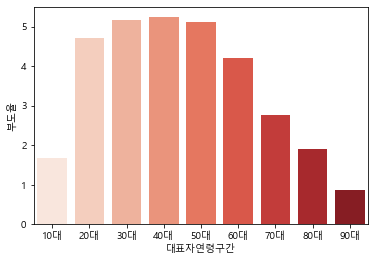

In [19]:
index=test.index
temp=test.columns
sns.barplot(x=index,y='부도율',data=test,palette="Reds")

### 연령별 정상률 : 중장년층의 정상률은 점점 낮아지는 추세

<AxesSubplot:xlabel='대표자연령구간', ylabel='정상률'>

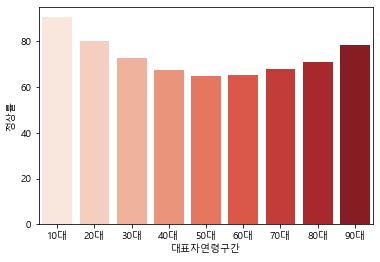

In [20]:
sns.barplot(x=index,y='정상률',data=test,palette="Reds")

### 폐업률은 연령, 업력이 높아질수록 자연스럽게 증가함을 알 수 있음

<AxesSubplot:xlabel='대표자연령구간', ylabel='폐업률'>

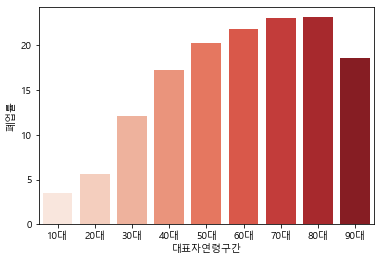

In [21]:
sns.barplot(x=index,y='폐업률',data=test,palette="Reds")